In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numba import jit
from scipy.sparse import diags

In [2]:
# Physical Constants
hbar = 1.055e-34      # Js
q = 1.602e-19         # C
m = 9.1e-31           # kg
m_dot = 0.2 * m       # kg  
bohr_radii = 5.29e-11 # m
a = 1e-10             # m

In [3]:
# Constants
alpha = 2.10e-5       # eV / nm^2
x1 = 0                # nm

In [4]:
def VQD(alpha, x1, x):
    return alpha * (x - x1) ** 2

In [5]:
def gauss(x, A, x0, sigma):
        return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def fit_gaussian(x, y, p0):
    popt, _ = curve_fit(gauss, x, y, p0)
    return popt

In [6]:
def compute_eigenvalue_eigenstates(U):
    H = diags([off, on + U, off], [-1, 0, 1])
    W, V = np.linalg.eig(H.toarray())
    idx = W.argsort()[::1]
    W = W[idx]
    V = V[:, idx]
    return W, V

In [7]:
for Np in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    X = a * np.linspace(-Np / 2, Np / 2, Np) / 1e-9  # nm
    t0 = hbar ** 2 / (2 * m_dot * ((X[1] - X[0]) * 1e-9) ** 2) / q
    on = 2.0 * t0 * np.ones(Np)
    off = -t0 * np.ones(Np - 1)
    U = np.array([VQD(alpha, x1,  x) for x in X])
    W, V = compute_eigenvalue_eigenstates(U)
    print(f'Energy Gap: {(W[1] - W[0]) / 1e-3:.2F} meV')
    Psi0 = np.multiply(V[:, 0], V[:, 0])
    Psi1 = np.multiply(V[:, 1], V[:, 1])
    A, mu, sigma = fit_gaussian(X, Psi0, [.01, 0, 5])
    print(f'Number of Atoms Spanned: {2 * sigma * 1e-9 / 0.543e-9:.2F}')


Energy Gap: 54.36 meV
Number of Atoms Spanned: 7.48
Energy Gap: 14.17 meV
Number of Atoms Spanned: 14.58


/home/roy/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Energy Gap: 6.92 meV
Number of Atoms Spanned: 20.58
Energy Gap: 4.78 meV
Number of Atoms Spanned: 24.13
Energy Gap: 4.15 meV
Number of Atoms Spanned: 25.25
Energy Gap: 4.02 meV
Number of Atoms Spanned: 25.42
Energy Gap: 4.00 meV
Number of Atoms Spanned: 25.43
Energy Gap: 4.00 meV
Number of Atoms Spanned: 25.43
Energy Gap: 4.00 meV
Number of Atoms Spanned: 25.43
Energy Gap: 4.00 meV
Number of Atoms Spanned: 25.43


Energy Gap: 4.004950513396867 meV
Number of Atoms Spanned: 25.43


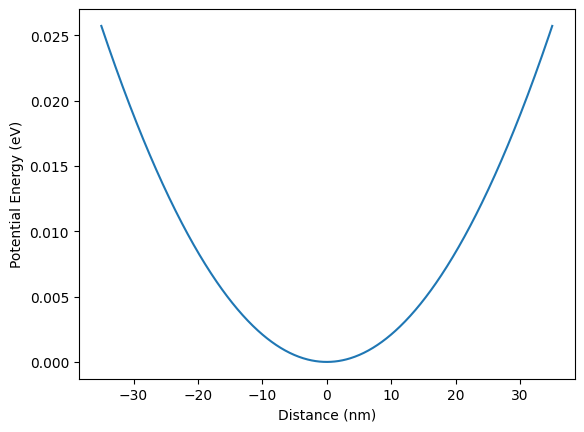

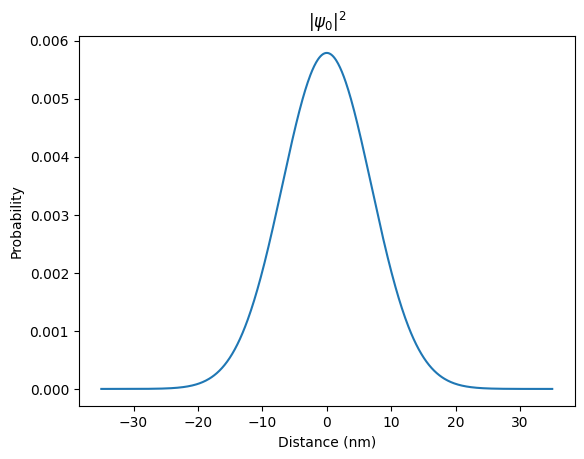

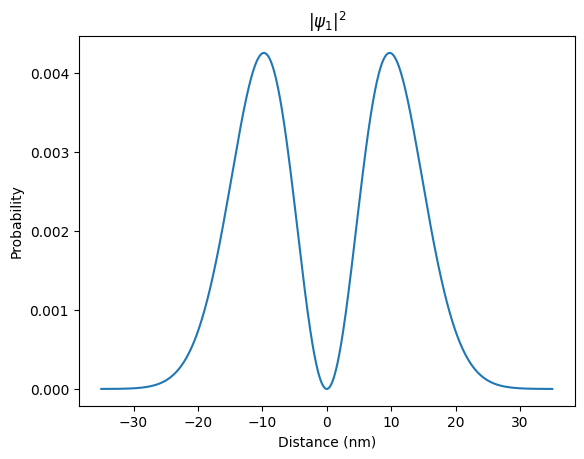

In [8]:
Np = 700
X = a * np.linspace(-Np / 2, Np / 2, Np) / 1e-9  # nm
t0 = hbar ** 2 / (2 * m_dot * ((X[1] - X[0]) * 1e-9) ** 2) / q
on = 2.0 * t0 * np.ones(Np)
off = -t0 * np.ones(Np - 1)
U = np.array([VQD(alpha, x1,  x) for x in X])
W, V = compute_eigenvalue_eigenstates(U)
print(f'Energy Gap: {(W[1] - W[0]) / 1e-3} meV')
Psi0 = np.multiply(V[:, 0], V[:, 0])
Psi1 = np.multiply(V[:, 1], V[:, 1])
A, mu, sigma = fit_gaussian(X, Psi0, [.01, 0, 5])
print(f'Number of Atoms Spanned: {2 * sigma * 1e-9 / 0.543e-9:.2F}')

plt.figure(1)
plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.show()

plt.figure(2)
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title(r'$|\psi_0|^2$')
plt.show()

plt.figure(3)
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title(r'$|\psi_1|^2$')
plt.show()